In [55]:
!pip install pandas
!pip install lifelines
!pip install numpy

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import WeibullAFTFitter  
from lifelines.utils import concordance_index
import numpy as np

In [57]:
# Load your dataset
data = pd.read_csv("data/Recurrence free survival in breast cancer patients.csv")  

weibull_fitter = WeibullAFTFitter()
weibull_fitter.fit(data, duration_col='time', event_col='status')


# Display the model summary
weibull_fitter.print_summary()
predicted_hazards = weibull_fitter.predict_cumulative_hazard(data).iloc[:, -1]  # Select last column only



<lifelines.WeibullAFTFitter: fitted with 686 total observations, 387 right-censored observations>
             duration col = 'time'
                event col = 'status'
   number of observations = 686
number of events observed = 299
           log-likelihood = -2581.20
         time fit was run = 2024-10-29 19:43:16 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                  
lambda_ age        0.01      1.01      0.01           -0.01            0.02                0.99                1.02
        grade     -0.21      0.81      0.08           -0.36           -0.06                0.70                0.94
        id        -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        men       -0.20      0.82      0.13           -0.46            0.05                0.63                1.06
        nodes     -0.04      0.96      0.01           -0.05           -0.03                0.95                0.97
        oest      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        prog       0.00      1.00      0.00            0.00            0.00                1.00                1.00
        size      -0.01      0.99      0.00           -0.01           -0.00                0.99                1.00
        treat      0.26      1.30      0.09            0.08            0.44                1.08                1.56
        Intercept  8.22   3725.08      0.32            7.59            8.86             1978.84             7012.29
rho_    Intercept  0.33      1.39      0.05            0.23            0.43                1.26                1.53

                   cmp to     z      p  -log2(p)
param   covariate                               
lambda_ age          0.00  1.02   0.31      1.70
        grade        0.00 -2.77   0.01      7.49
        id           0.00 -0.03   0.98      0.04
        men          0.00 -1.54   0.12      3.03
        nodes        0.00 -7.16 <0.005     40.14
        oest         0.00 -0.47   0.64      0.64
        prog         0.00  3.95 <0.005     13.62
        size         0.00 -2.00   0.05      4.47
        treat        0.00  2.80   0.01      7.62
        Intercept    0.00 25.48 <0.005    473.23
rho_    Intercept    0.00  6.76 <0.005     36.09
---
Concordance = 0.69
AIC = 5184.39
log-likelihood ratio test = 112.16 on 9 df
-log2(p) of ll-ratio test = 64.02

In [58]:
time_points = np.linspace(0, data['time'].max(), 100)  # Generate time points for plotting
survival_probs = weibull_fitter.predict_survival_function(data.iloc[0:1], times=time_points)  # Sample survival function

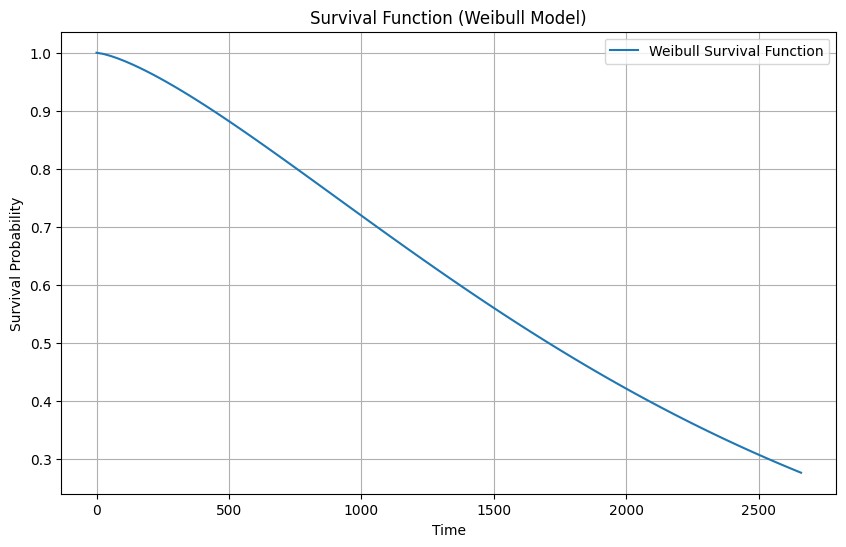

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(time_points, survival_probs.iloc[:, 0], label='Weibull Survival Function')  # Select the first column without transposing
plt.title('Survival Function (Weibull Model)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
cumulative_hazards = weibull_fitter.predict_cumulative_hazard(data.iloc[0:1], times=time_points)

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(time_points, cumulative_hazards.iloc[:, 0], label="Weibull Cumulative Hazard Function")  # Select the first column
plt.title("Cumulative Hazard Function (Weibull Model)")
plt.xlabel("Time")
plt.ylabel("Cumulative Hazard")
plt.grid(True)
plt.legend()
plt.show()

AttributeError: 'WeibullAFTFitter' object has no attribute 'plot_cumulative_hazard'

<Figure size 1000x600 with 0 Axes>